# Holt Winter’s Exponential Smoothing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from statsmodels.tsa.holtwinters import ExponentialSmoothing

Reading in CDC hospitalization data

In [2]:
df_hospital = pd.read_csv('../data/hospital_visits.csv')
df_hospital['Week'] = df_hospital.Week.map(str) + "-" + df_hospital.Year.map(str)
df_hospital = df_hospital[['Total ILI']]
list_data = list(df_hospital['Total ILI'])

In [3]:
list_data = list(df_hospital['Total ILI'])

#### Defining the HWES model - forecasting the last 52 weeks

In [9]:
model = ExponentialSmoothing(list_data[:-52], seasonal='add', seasonal_periods=52)
model_fit = model.fit()

C:\Users\steph\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [10]:
future = 52
predictions = model_fit.forecast(future)
future_weeks = list(range(len(list_data) - future - 1, len(list_data) + future - 1))

In [11]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions')

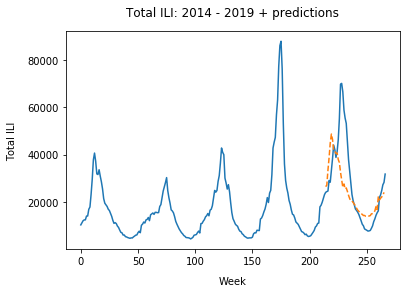

In [12]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions", pad=15)

In [13]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,215
Model:,ExponentialSmoothing,SSE,2148974061.835
Optimized:,True,AIC,3573.288
Trend:,None,BIC,3755.302
Seasonal:,Additive,AICC,3613.693
Seasonal Periods:,52,Date:,"Tue, 10 Dec 2019"
Box-Cox:,False,Time:,13:37:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,0.000000,gamma,True


#### Defining the HWES model - forecasting the next 52 weeks

In [4]:
model = ExponentialSmoothing(list_data, seasonal='add', seasonal_periods=52)
model_fit = model.fit()

C:\Users\steph\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [5]:
future = 52
predictions = model_fit.forecast(future)
future_weeks = list(range(len(list_data) - 1, len(list_data) + future))

In [6]:
predictions_df = pd.DataFrame([future_weeks, predictions]).transpose()
predictions_df.columns = ['Week', 'Total ILI']
predictions_df = predictions_df.set_index('Week')

Text(0.5, 1.0, 'Total ILI: 2014 - 2019 + predictions')

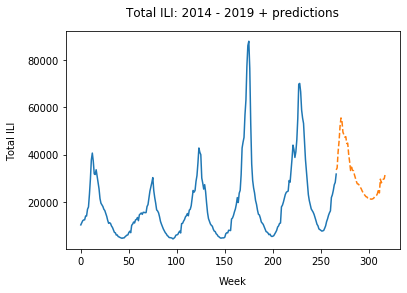

In [7]:
plt.plot(df_hospital['Total ILI'])
plt.plot(predictions_df, '--')
plt.xlabel("Week", labelpad=10)
plt.ylabel("Total ILI", labelpad=10)
plt.title("Total ILI: 2014 - 2019 + predictions", pad=15)

In [8]:
model_fit.summary()

Dep. Variable:,endog,No. Observations:,267
Model:,ExponentialSmoothing,SSE,2865386420.113
Optimized:,True,AIC,4430.388
Trend:,None,BIC,4624.100
Seasonal:,Additive,AICC,4460.788
Seasonal Periods:,52,Date:,"Tue, 10 Dec 2019"
Box-Cox:,False,Time:,13:33:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_seasonal,0.000000,gamma,True
